<a href="https://colab.research.google.com/github/SongyangZhou/TensorFlow_Implementing/blob/main/04-Convolutional%20NN%20implementing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convolutional Neural Network for images classification practice.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rajarshi2712/dogs-and-cats-classifier")

print("Path to dataset files:", path)

100%|██████████| 271M/271M [00:02<00:00, 112MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rajarshi2712/dogs-and-cats-classifier/versions/1


In [3]:
import os
dataset_path = path
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")
valid_path = os.path.join(dataset_path, "valid")

import tensorflow as tf
import numpy as np

# Function to assign binary labels based on the first three letters of the folder's name
def assign_label(image, label):
    """
    Assign label 1 if the first three letters of the class name are 'dog',
    otherwise assign label 0.
    """
    # Find the label index where the one-hot encoding is 1
    label_index = tf.argmax(label, axis=-1)

    # Get the class name using the index from `class_names`
    class_name = tf.gather(class_names, label_index)

    # Check if the first three letters are 'dog'
    new_label = tf.where(
        tf.strings.substr(class_name, 0, 3) == "dog", 1, 0
    )
    return image, new_label

def normalize_image(image, label):
    """
    Normalize image pixel values to the range [0, 1].
    """
    image = tf.cast(image, tf.float32) / 255.0  # Convert to float and normalize
    return image, label


In [4]:
# Preprocessing:
# Assigning the image with label of dog or cat based on the name of the folders.
# Load the training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(224, 224),
    batch_size=32,   # when the dataset is big, we usually load data in batches, and TensorFlow can well support batched data to avoid memory issues.
    label_mode="categorical",
    shuffle = True  # usually we use the default setting as TURE in practice. Here False is for debuging.
)

# Get the class names from the dataset
class_names = tf.constant(train_dataset.class_names)  # Convert class names to a Tensor

# Map the assign_label function to the dataset
train_dataset = train_dataset.map(assign_label, num_parallel_calls=tf.data.AUTOTUNE)

# Map the normalize_image function to the dataset
train_dataset = train_dataset.map(normalize_image, num_parallel_calls=tf.data.AUTOTUNE)

# Prefetch for performance
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Inspect the dataset
for images, labels in train_dataset.take(1):
    print("Image shape:", images[0].shape)
    print("Labels (dog=1, cat=0):", labels[:5].numpy())
    print("Image:", images[0])

Found 26752 files belonging to 104 classes.
Image shape: (224, 224, 3)
Labels (dog=1, cat=0): [0 1 0 1 1]
Image: tf.Tensor(
[[[0.         0.00784314 0.        ]
  [0.9647059  0.9882353  0.98039216]
  [0.9764706  1.         0.99215686]
  ...
  [0.50980395 0.48235294 0.45882353]
  [0.56078434 0.53333336 0.50980395]
  [0.61960787 0.5921569  0.5686275 ]]

 [[0.         0.00784314 0.        ]
  [0.9647059  0.9882353  0.98039216]
  [0.9764706  1.         0.99215686]
  ...
  [0.5137255  0.4862745  0.4627451 ]
  [0.5647059  0.5372549  0.5137255 ]
  [0.62352943 0.59607846 0.57254905]]

 [[0.         0.00784314 0.        ]
  [0.9647059  0.9882353  0.98039216]
  [0.9764706  1.         0.99215686]
  ...
  [0.5137255  0.4862745  0.4627451 ]
  [0.57254905 0.54509807 0.52156866]
  [0.6431373  0.6156863  0.5921569 ]]

 ...

 [[0.         0.00784314 0.        ]
  [0.90588236 0.92941177 0.92156863]
  [0.9098039  0.93333334 0.9254902 ]
  ...
  [0.5372549  0.49803922 0.45882353]
  [0.5254902  0.4862745  0

We can see from above, the value of pixels are between 0-1, the labels are dog = 1 or cat = 0 based on the folders' names.  The image size is correct.

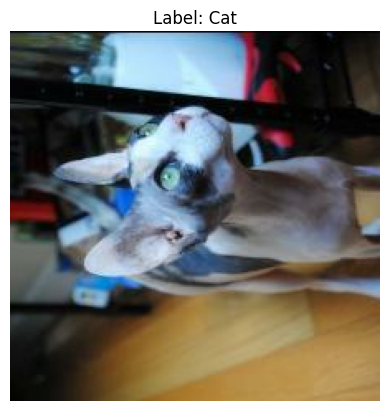

In [7]:
# check the dataset with printing out the pic and label.
import matplotlib.pyplot as plt

for images, labels in train_dataset.take(1):  # Take one batch
    # Select the first image and label from the batch
    image = images[0]  # First image in the batch
    label = labels[0]  # Corresponding label

    # Display the image
    plt.imshow(image)
    plt.title(f"Label: {'Dog' if label.numpy() == 1 else 'Cat'}")
    plt.axis("off")  # Remove axes for a cleaner look
    plt.show()
    break  # Exit after displaying one image

In [8]:
# After Check the preprocessing above, we can apply the preprocessing to the valid and test set
# (Valid dataset)
# Preprocessing:
# Assigning the image with label of dog or cat based on the name of the folders.
# Load the training dataset
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    valid_path,
    image_size=(224, 224),
    batch_size=32,   # when the dataset is big, we usually load data in batches, and TensorFlow can well support batched data to avoid memory issues.
    label_mode="categorical",
    shuffle = True # usually we use the default setting as TURE in practice. Here False is for debuging.
)

# Get the class names from the dataset
class_names = tf.constant(valid_dataset.class_names)  # Convert class names to a Tensor

# Map the assign_label function to the dataset
valid_dataset = valid_dataset.map(assign_label, num_parallel_calls=tf.data.AUTOTUNE)

# Map the normalize_image function to the dataset
valid_dataset = valid_dataset.map(normalize_image, num_parallel_calls=tf.data.AUTOTUNE)

# Prefetch for performance
valid_dataset = valid_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Inspect the dataset
for images, labels in valid_dataset.take(1):
    print("Image shape:", images[0].shape)
    print("Labels (dog=1, cat=0):", labels[:5].numpy())

# (Test dataset)
# Preprocessing:
# Assigning the image with label of dog or cat based on the name of the folders.
# Load the training dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=(224, 224),
    batch_size=32,   # when the dataset is big, we usually load data in batches, and TensorFlow can well support batched data to avoid memory issues.
    label_mode="categorical",
    shuffle = True  # usually we use the default setting as TURE in practice. Here False is for debuging.
)

# Get the class names from the dataset
class_names = tf.constant(test_dataset.class_names)  # Convert class names to a Tensor

# Map the function to the dataset
test_dataset = test_dataset.map(assign_label, num_parallel_calls=tf.data.AUTOTUNE)

# Map the normalize_image function to the dataset
test_dataset = test_dataset.map(normalize_image, num_parallel_calls=tf.data.AUTOTUNE)

# Prefetch for performance
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Inspect the dataset
for images, labels in test_dataset.take(1):
    print("Image shape:", images[0].shape)
    print("Labels (dog=1, cat=0):", labels[:5].numpy())

Found 1339 files belonging to 104 classes.
Image shape: (224, 224, 3)
Labels (dog=1, cat=0): [1 0 1 1 1]
Found 892 files belonging to 104 classes.
Image shape: (224, 224, 3)
Labels (dog=1, cat=0): [1 1 1 1 0]


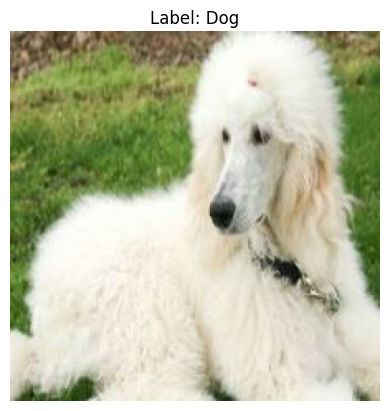

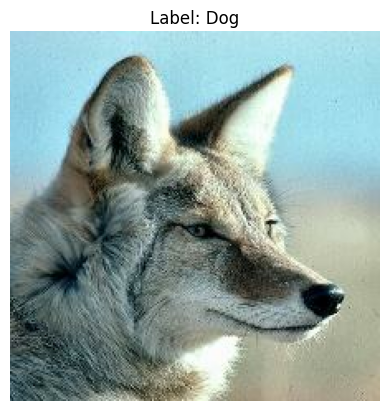

In [9]:
for images, labels in valid_dataset.take(1):  # Take one batch
    # Select the first image and label from the batch
    image = images[0]  # First image in the batch
    label = labels[0]  # Corresponding label

    # Display the image
    plt.imshow(image)
    plt.title(f"Label: {'Dog' if label.numpy() == 1 else 'Cat'}")
    plt.axis("off")  # Remove axes for a cleaner look
    plt.show()
    break  # Exit after displaying one image

for images, labels in test_dataset.take(1):  # Take one batch
    # Select the first image and label from the batch
    image = images[0]  # First image in the batch
    label = labels[0]  # Corresponding label

    # Display the image
    plt.imshow(image)
    plt.title(f"Label: {'Dog' if label.numpy() == 1 else 'Cat'}")
    plt.axis("off")  # Remove axes for a cleaner look
    plt.show()
    break  # Exit after displaying one image

We have finished the data preprocessing.
Next, we can build our own CNN for binary classication.

In [11]:
# build your CNN model
from tensorflow.keras import layers, models

# Create a Sequential model
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [54]:
# Train the model
history = model.fit(train_dataset, epochs=1, validation_data=valid_dataset)  # for saving time, the epochs here equals 1. In practice you can set the number as 10 or more accordingly.

836/836 ━━━━━━━━━━━━━━━━━━━━ 3131s 4s/step - accuracy: 0.7187 - loss: 0.5784 - val_accuracy: 0.8260 - val_loss: 0.3935


In [55]:
# evaluate the model with test dataset
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7796 - loss: 0.4519
Test accuracy: 0.8127802610397339


In [60]:
# Make prediction
predictions = model.predict(test_dataset)
predictions = tf.round(predictions).numpy().flatten()  # Round to 0 or 1
true_labels = tf.concat([labels for _, labels in test_dataset], axis=0).numpy()
print("Predictions:", predictions)
print("True Labels:", true_labels)

28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step
Predictions: [0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.

In [ ]:
# model export
model.save("my_CNN_model.h5")


We have finished the full loop of CNN Binary Classifier.

***NOTE:In practice, do not try to be hero, ***which means do not build the CNN architecture from scratch by yourself.

Use well pretrained models as base and add your layer based on the context of your problem, and train the trainable parameters in your layers. That will make things easier and faster.

refer to the link below to know more about the pre-trained models
https://keras.io/api/applications/

if you care about the accuracy, try ResNet-50 or ResNet-101
if you want an efficient network, try MobileNets and ShuffleNets

Here is an example of using pre-trained model as model and add customized layers

ResNet-50



In [12]:
from tensorflow.keras.applications import ResNet50

# Load the pre-trained ResNet50 model as base model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224,3))

base_model.trainable = False  # keep the parameters of the base model layers

# Create a costomized model on top
model = models.Sequential([
    base_model,  # the base model
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(train_dataset, epochs=1, validation_data=valid_dataset)

836/836 ━━━━━━━━━━━━━━━━━━━━ 5560s 7s/step - accuracy: 0.6667 - loss: 0.8915 - val_accuracy: 0.6945 - val_loss: 0.5551


Then you can evaluate the model with test data, and use the model to predict as shown already.